In [5]:
import sys
sys.path.append('../')
import numpy as np

%load_ext line_profiler
%load_ext autoreload
%autoreload 2

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Test Loss & Accuracy

In [2]:
from point_defect_learn.eval import main
epoch = 269
main(epoch=epoch)

Seed set to 2
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: ../logs/logs_CrossEntropy_conv2d_robust_2/preds/lightning_logs


Testing DataLoader 0: 100%|██████████| 44/44 [00:01<00:00, 38.26it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      test_loss_epoch      │            nan            │
└───────────────────────────┴───────────────────────────┘

In [3]:
from distortion_learning.eval import compute_accuracy
epoch = 269
accuracy = compute_accuracy('train', epoch=epoch)
accuracy = compute_accuracy('val', epoch=epoch)
accuracy = compute_accuracy('test', epoch=epoch)

Seed set to 2


../logs/logs_CrossEntropy_conv2d_robust_2/checkpoints/epoch=269-val_loss=0.00.ckpt


Seed set to 2


Accuracy on the train set: 90.27%
Top-2 accuracy on the train set: 100.00%
Top-3 accuracy on the train set: 100.00%
../logs/logs_CrossEntropy_conv2d_robust_2/checkpoints/epoch=269-val_loss=0.00.ckpt


Seed set to 2


Accuracy on the val set: 81.22%
Top-2 accuracy on the val set: 99.72%
Top-3 accuracy on the val set: 99.79%
../logs/logs_CrossEntropy_conv2d_robust_2/checkpoints/epoch=269-val_loss=0.00.ckpt
Accuracy on the test set: 80.10%
Top-2 accuracy on the test set: 99.72%
Top-3 accuracy on the test set: 99.93%


# Training process

In [7]:
from point_defect_learn.eval import retrieve_data
data = retrieve_data(version=0, print_cfg=False)

Seed set to 2


log_filepath: ../logs/logs_CrossEntropy_conv2d_robust_2/lightning_logs/version_0/events.out.tfevents.1713472063.LingsMacStudio.5046.0
Scalar Keys: ['hp_metric', 'train_loss_step', 'epoch', 'val_loss_step', 'val_loss_epoch', 'train_loss_epoch', 'learning_rate']


In [17]:
data['train_loss_epoch'] = data['train_loss_epoch'][:200]
data['val_loss_epoch'] = data['val_loss_epoch'][:200]

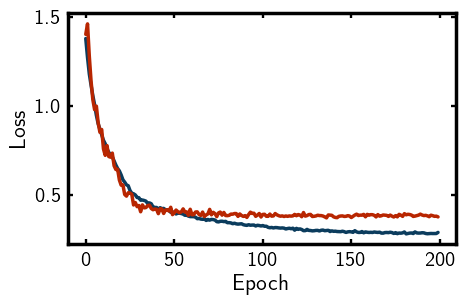

In [18]:
from point_defect_learn.plot_utils import plot_eval_data

plot_eval_data(data, ['train_loss_epoch', 'val_loss_epoch'], figsize=(5, 3), title=None, ylabel='Loss', save=True, save_dir='../figs/', save_filename='loss.pdf')

# Confusion Matrix

Seed set to 2


../logs/logs_CrossEntropy_conv2d_robust_2/checkpoints/epoch=269-val_loss=0.00.ckpt
Confusion matrix saved to ../figs/confusion_matrix_test.pdf


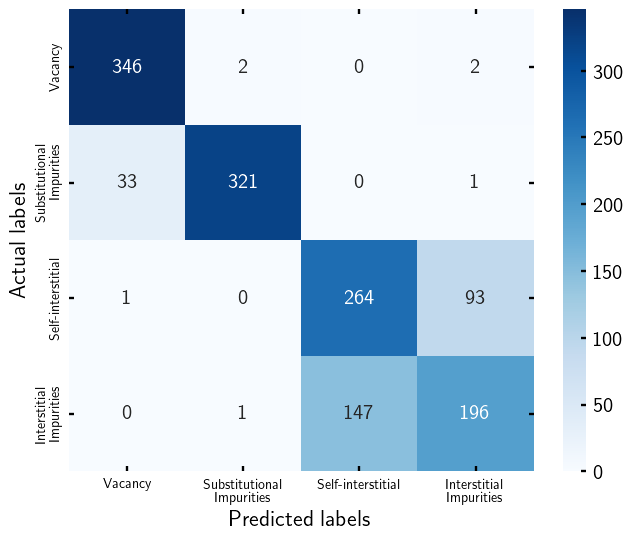

In [24]:
from point_defect_learn.eval import plot_confusion_matrix
epoch = 269
plot_confusion_matrix('test', epoch=epoch,
                      ticklabels=["Vacancy", "Substitutional\nImpurities", "Self-interstitial", "Interstitial\nImpurities"],
                      figsize=(7.5, 6), print_cfg=False, if_plot=True, if_save=True, save_dir='../figs')

# Predict Single Data

In [ ]:
from point_defect_learn.eval import pred_single
epoch = 269
filename = 'pure_metal_vac/icsd_012174_dim5_vac_3p805487.gr'
prediction = pred_single(filename, epoch=epoch, print_cfg=False)

Seed set to 1


../logs/logs_CrossEntropy_conv2d_robust_1/checkpoints/epoch=208-val_loss=0.00.ckpt
Ground Truth: [[1. 0. 0. 0.]]
Probabilities: [[7.6858211e-01 2.3066673e-01 4.9013503e-05 7.0207368e-04]]
Predicted Class: 1
